In [168]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [169]:
# importing data sets 
movie_data = pd.read_csv("movies.dat",
                       sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
users_data = pd.read_csv("users.dat",
                       sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("ratings.dat",
                       sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

<ipython-input-169-8bdf4e97ccb4>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
<ipython-input-169-8bdf4e97ccb4>:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engi

In [170]:
ratings_user = pd.merge(ratings_data,users_data, on=['UserID'])
ratings_movie = pd.merge(ratings_data,movie_data, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title','Genres', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]
master_data.head()

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,F,10,5
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,F,10,3
2,914,My Fair Lady (1964),Musical|Romance,1,1,F,10,3
3,3408,Erin Brockovich (2000),Drama,1,1,F,10,4
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,F,10,5


Data Exploration

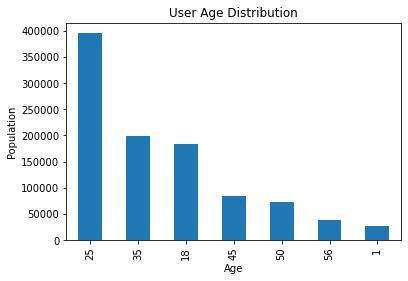

In [171]:
#1.User Age Distribution
master_data['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Population')
plt.show()

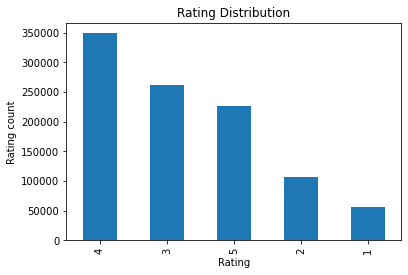

In [172]:
# By Rating Distribution
master_data['Rating'].value_counts().plot(kind ='bar')
plt.xlabel("Rating")
plt.title("Rating Distribution")
plt.ylabel('Rating count')
plt.show()

In [173]:
#2.User rating of the movie “Toy Story”
ToyStory_rating=ratings_data.groupby('UserID').size()
ToyStory_rating = master_data[master_data.Title == "Toy Story (1995)"]

ToyStory_rating

#ToyStory_data = ratings_data[ratings_data.MovieID==1]
#ToyStory_data

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating
40,1,Toy Story (1995),Animation|Children's|Comedy,1,1,F,10,5
469,1,Toy Story (1995),Animation|Children's|Comedy,6,50,F,9,4
581,1,Toy Story (1995),Animation|Children's|Comedy,8,25,M,12,4
711,1,Toy Story (1995),Animation|Children's|Comedy,9,25,M,17,5
837,1,Toy Story (1995),Animation|Children's|Comedy,10,35,F,1,5
...,...,...,...,...,...,...,...,...
997248,1,Toy Story (1995),Animation|Children's|Comedy,6022,25,M,17,5
997541,1,Toy Story (1995),Animation|Children's|Comedy,6025,25,F,1,5
998170,1,Toy Story (1995),Animation|Children's|Comedy,6032,45,M,7,4
998360,1,Toy Story (1995),Animation|Children's|Comedy,6035,25,F,1,4


In [174]:
ToyStory_rating.groupby(["Title","Rating"]).size()

Title             Rating
Toy Story (1995)  1          16
                  2          61
                  3         345
                  4         835
                  5         820
dtype: int64

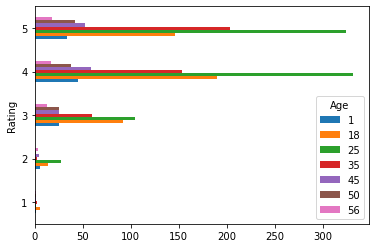

In [175]:
ToyStory_rating.groupby(["Rating","Age"]).size().unstack().plot(kind ='barh',stacked = False,legend = True)
plt.show()

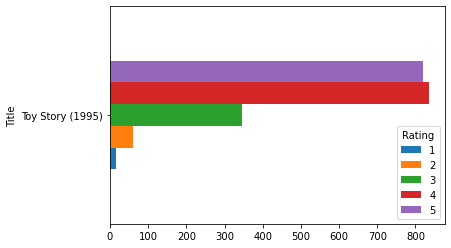

In [176]:
#2:User rating of the movie “Toy Story”
ToyStory_rating.groupby(["Title","Rating"]).size().unstack().plot(kind ='barh',stacked = False,legend = True)
plt.show()

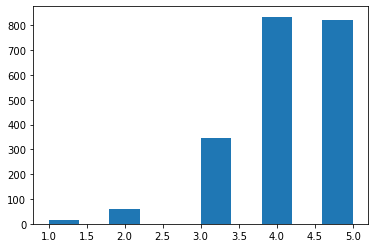

In [177]:
#2: User rating of the movie “Toy Story”
plt.hist(x=ToyStory_rating.Rating,bins = 10)
plt.show()

In [178]:
#3: Top 25 movies by viewership rating
df_Top_25 = master_data.groupby('Title').size().sort_values(ascending=False)[:25]
df_Top_25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

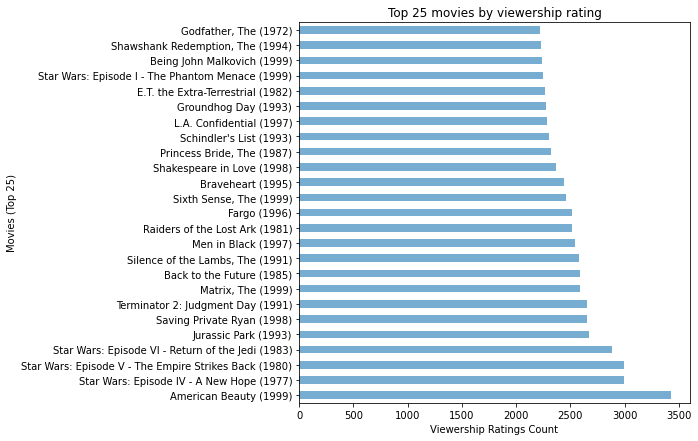

In [179]:
df_Top_25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

In [180]:
#4:Find the ratings for all the movies reviewed by for a particular user of user id = 2696
userId = 2696
userRatingById = master_data[master_data["UserID"] == userId]
print(userRatingById.shape)
userRatingById.

(20, 8)


,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",Horror,2696,25,M,7,4
440668,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,25,M,7,2
440669,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,25,M,7,4
440670,1625,"Game, The (1997)",Mystery|Thriller,2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller,2696,25,M,7,4
440673,1805,Wild Things (1998),Crime|Drama|Mystery|Thriller,2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",Mystery|Thriller,2696,25,M,7,4
440675,800,Lone Star (1996),Drama|Mystery,2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller,2696,25,M,7,2


In [193]:
#Feature Engineering

In [194]:
# Finding all the unique Geners
df_Genres = master_data['Genres'].str.split("|")

In [195]:
df_Genres.head()

0                             [Drama]
1    [Animation, Children's, Musical]
2                  [Musical, Romance]
3                             [Drama]
4     [Animation, Children's, Comedy]
Name: Genres, dtype: object

In [197]:
# Creating a list of all the unique Generes 
listGenres = set()
for genre in df_Genres:
    listGenres = listGenres.union(set(genre))

In [198]:
listGenres # List of all the unique genere

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [199]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [201]:
ratingsOneHot = master_data['Genres'].str.get_dummies("|")
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [203]:
# Merging the 2 data sets df_df_Master_Data and ratratingsOneHot
master_data = pd.concat([master_data,ratingsOneHot],axis=1)

In [204]:
master_data.head()

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,F,10,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,914,My Fair Lady (1964),Musical|Romance,1,1,F,10,3,0,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,Erin Brockovich (2000),Drama,1,1,F,10,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
master_data.to_csv('Final data set.csv')

In [206]:
# Creating a new colum with the year for the movies
master_data[["title","Year"]] = master_data.Title.str.extract("(.)\s\((.\d+)",expand=True)
master_data = master_data.drop(columns=['title'])

In [207]:
master_data.head()

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,1975
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,F,10,3,0,0,...,0,0,1,0,0,0,0,0,0,1996
2,914,My Fair Lady (1964),Musical|Romance,1,1,F,10,3,0,0,...,0,0,1,0,1,0,0,0,0,1964
3,3408,Erin Brockovich (2000),Drama,1,1,F,10,4,0,0,...,0,0,0,0,0,0,0,0,0,2000
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,1998


In [208]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 27 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int32 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int32 
 4   Age          1000209 non-null  int32 
 5   Gender       1000209 non-null  object
 6   Occupation   1000209 non-null  int32 
 7   Rating       1000209 non-null  int32 
 8   Action       1000209 non-null  int64 
 9   Adventure    1000209 non-null  int64 
 10  Animation    1000209 non-null  int64 
 11  Children's   1000209 non-null  int64 
 12  Comedy       1000209 non-null  int64 
 13  Crime        1000209 non-null  int64 
 14  Documentary  1000209 non-null  int64 
 15  Drama        1000209 non-null  int64 
 16  Fantasy      1000209 non-null  int64 
 17  Film-Noir    1000209 non-null  int64 
 18  Horror       1000209 n

In [216]:
#Model Creation

In [217]:
# Deeveloping The model on first 500 entries
first_1000 = master_data[:1000]

In [218]:
# Creating and selectiong features and labels for the model
x_features = first_1000[['MovieID','Age','Occupation']].values
y_labels = first_1000[['Rating']].values

In [219]:
# Creating a Test train split
from sklearn.model_selection import train_test_split

# Test train split 
x_train, x_test, y_train_labels, y_test_labels = train_test_split(x_features,y_labels,test_size=0.33,random_state=42)

In [220]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train_labels)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train_labels) * 100, 2)
acc_log

/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


36.27

In [221]:
#SVM
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(x_train, y_train_labels)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train_labels) * 100, 2)
acc_svc

/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


37.31

In [222]:
#KNNlinear_svc = LinearSVC()
linear_svc.fit(x_train, y_train_labels)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train_labels) * 100, 2)
acc_linear_svc
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train_labels)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train_labels) * 100, 2)
acc_knn

/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


58.66

In [223]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train_labels)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train_labels) * 100, 2)
acc_linear_svc

/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


36.42

In [224]:
#Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train_labels)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train_labels) * 100, 2)
acc_perceptron

/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


35.52

In [225]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train_labels)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train_labels) * 100, 2)
acc_gaussian

/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


37.01

In [226]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train_labels)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train_labels) * 100, 2)
acc_sgd

/Users/varadkhot/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


7.31

In [227]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train_labels)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train_labels) * 100, 2)
acc_decision_tree

100.0

In [228]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train_labels)
Y_pred = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train, y_train_labels) * 100, 2)
acc_random_forest

<ipython-input-228-bea825329f3a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train_labels)


100.0

In [229]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,58.66
0,Support Vector Machines,37.31
4,Naive Bayes,37.01
7,Linear SVC,36.42
2,Logistic Regression,36.27
5,Perceptron,35.52
6,Stochastic Gradient Decent,7.31
